In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from PIL import Image
from numpy.linalg import inv
import cv2
import time

import sys
sys.path.insert(1, '..')
from DON_Picking.Configuration import config,SINGLE_OBJECT_WITHIN_SCENE

from DON_Training.DataGenerator_O2O import DataGenerator,loadAllModels,convertToHeatmap
from ITRIP.objects_new import graspnet_train
import matplotlib.pyplot as plt

scaleCmToPx 0.09598826886969584


In [2]:
dataGenerator = DataGenerator()
models, colors = loadAllModels(listObject=graspnet_train,path="../../dataDON/")

100%|██████████| 28/28 [02:39<00:00,  5.71s/it]

Loaded 87 models in 159 seconds


In [3]:
 
dataGenerator.setOriginalModelObjects(models, colors)

#dataGenerator.resampleObjectModels()

(220361, 4)


In [243]:
nTry = 1000
totalTime = [0,0,0,0,0]
totalMatchPoint = [0,0,0,0,0]
totalNonMatch = [0,0,0,0,0]

type_scene  = 3
print ("type_scene",type_scene)
for i in range (1):
    print (i)
    start_time = time.time()
    _,_,_,_,_,_,_,_,_,_,nMatchPoint, nNonMatchPoint = dataGenerator.generateRandomData(pathToScense="../../dataDON/", sceneType=type_scene, augmentationType =0 , debug=True)
    end_time = time.time()
    totalTime[type_scene] += (end_time - start_time)
    totalMatchPoint[type_scene] += nMatchPoint
    totalNonMatch[type_scene] += nNonMatchPoint


totalTime  = np.array(totalTime)
totalTime = totalTime/nTry
totalMatchPoint = np.array(totalMatchPoint)
totalMatchPoint = totalMatchPoint/nTry
totalNonMatch = np.array(totalNonMatch)
totalNonMatch = totalNonMatch/nTry

type_scene 3
0


[0.         0.27400875 0.47369952 1.42472091 1.33350282] [0, 1, 2, 3, 4]


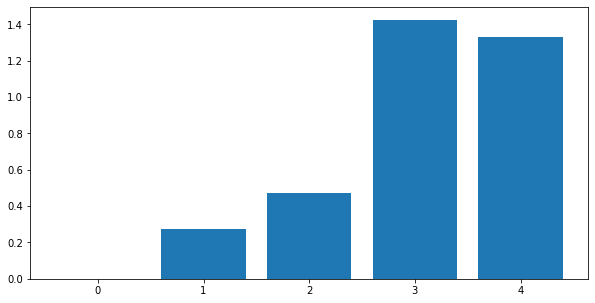

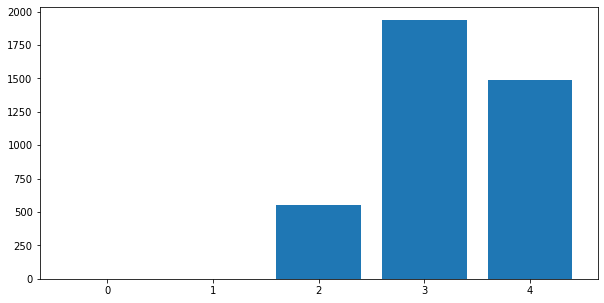

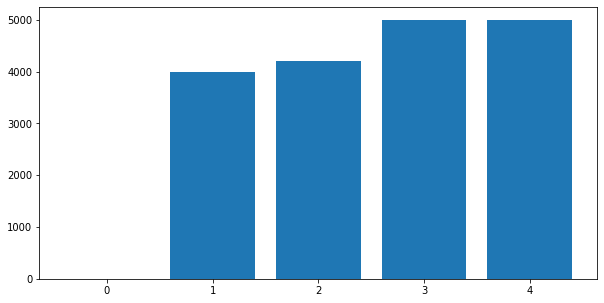

In [5]:



print (totalTime,list(range(5)))

fig = plt.figure(figsize = (10, 5))
plt.bar(list(range(5)),totalTime)
plt.show()

fig = plt.figure(figsize = (10, 5))
plt.bar(list(range(5)),totalMatchPoint)
plt.show()

fig = plt.figure(figsize = (10, 5))
plt.bar(list(range(5)),totalNonMatch)
plt.show()

In [67]:
type_scene = 3
start_time = time.time()
_,_,_,_,_,_,_,_,_,_,nMatchPoint, nNonMatchPoint = dataGenerator.generateRandomData(pathToScense="../../dataDON/", sceneType=type_scene, augmentationType =0 , debug=True)
end_time = time.time()
totalTime[type_scene] += (end_time - start_time)
totalMatchPoint[type_scene] += nMatchPoint
totalNonMatch[type_scene] += nNonMatchPoint

5 11
(256, 256, 4)
